In [1]:
!pip install torch torchvision

In [0]:
# Initialize pretrained Inception V3 model
import torchvision.models as models
model = models.inception_v3(pretrained=True)
model.transform_input = True

In [0]:
# Download an image
import requests
image_url = "http://r.ddmcdn.com/s_f/o_1/cx_462/cy_245/cw_1349/ch_1349/w_720/APL/uploads/2015/06/caturday-shutterstock_149320799.jpg"
image_data = requests.get(image_url).content
with open('image.jpg', 'wb') as outfile:
    outfile.write(image_data)

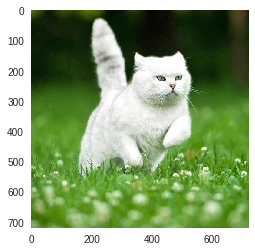

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
im = Image.open('image.jpg')
plt.imshow(im)
plt.grid(False)

In [0]:
# Define the preprocessing function
from torch.autograd import Variable
import torchvision.transforms as transforms

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(299),
   transforms.ToTensor(),
   normalize
])

img_tensor = preprocess(im)
img_tensor.unsqueeze_(0)
img_variable = Variable(img_tensor)

model.eval()
preds = model(img_variable)

In [0]:
# Download the dictionary of labels
import json
content = requests.get("https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json").text
labels = json.loads(content)

In [37]:
# Convert the prediction into text labels
# Get the top 3 predictions
predictions = []
for i, score in enumerate(preds[0].data.numpy()):
    predictions.append((score, labels[str(i)][1]))
   
predictions.sort(reverse=True)
for score, label in predictions[:3]:
    print('{:16s}: {:.4f}'.format(label, score))

Persian_cat     : 10.6303
lynx            : 3.8951
Angora          : 3.6476
